<h2>Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as PathEffects
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap
import warnings

<h2>Text Properties

In [12]:
font_title = {'fontname' : 'din condensed', 'color' : 'darkgrey', 'size':'70', 'weight':'bold'}
font_anno_dark = {'fontname' : 'din condensed', 'color' : 'darkgrey', 'size':'25'}
font_anno_dark_small = {'fontname' : 'din condensed', 'color' : 'darkgrey', 'size':'15'}
font_anno_light = {'fontname' : 'din condensed', 'color' : 'oldlace', 'size' : '35'}
font_anno_light_small = {'fontname' : 'din condensed', 'color' : 'oldlace', 'size' : '25'}
font_background = {'fontname' : 'din condensed', 'color' : 'white', 'size' : '135'}
font_sankey = {'fontname' : 'din condensed', 'color' : 'white', 'size' : '25', 
               'path_effects': [PathEffects.withStroke(linewidth=3, foreground='b')]}
rect_prop = {'color': '#79F10E', 'alpha': 0.2, 'zorder': 1}

<h2>Data

In [5]:
world = gpd.read_file('ne_110m_admin_0_countries.shp') # geopandas file
women = pd.read_csv('htec_emp_reg2_page_linear WOMEN.csv') # custom file, can be replaced. required col: 'geo', 'OBS_VALUE
women['geo'] = women['geo'].str[:2] # discrepancy between country codes of geopandas and data set
men = pd.read_csv('htec_emp_reg2_page_linear MEN.csv')
men['geo'] = men['geo'].str[:2]
total = pd.read_csv('htec_emp_reg2_page_linear TOTAL.csv')
total['geo'] = total['geo'].str[:2]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

<h2>Plot

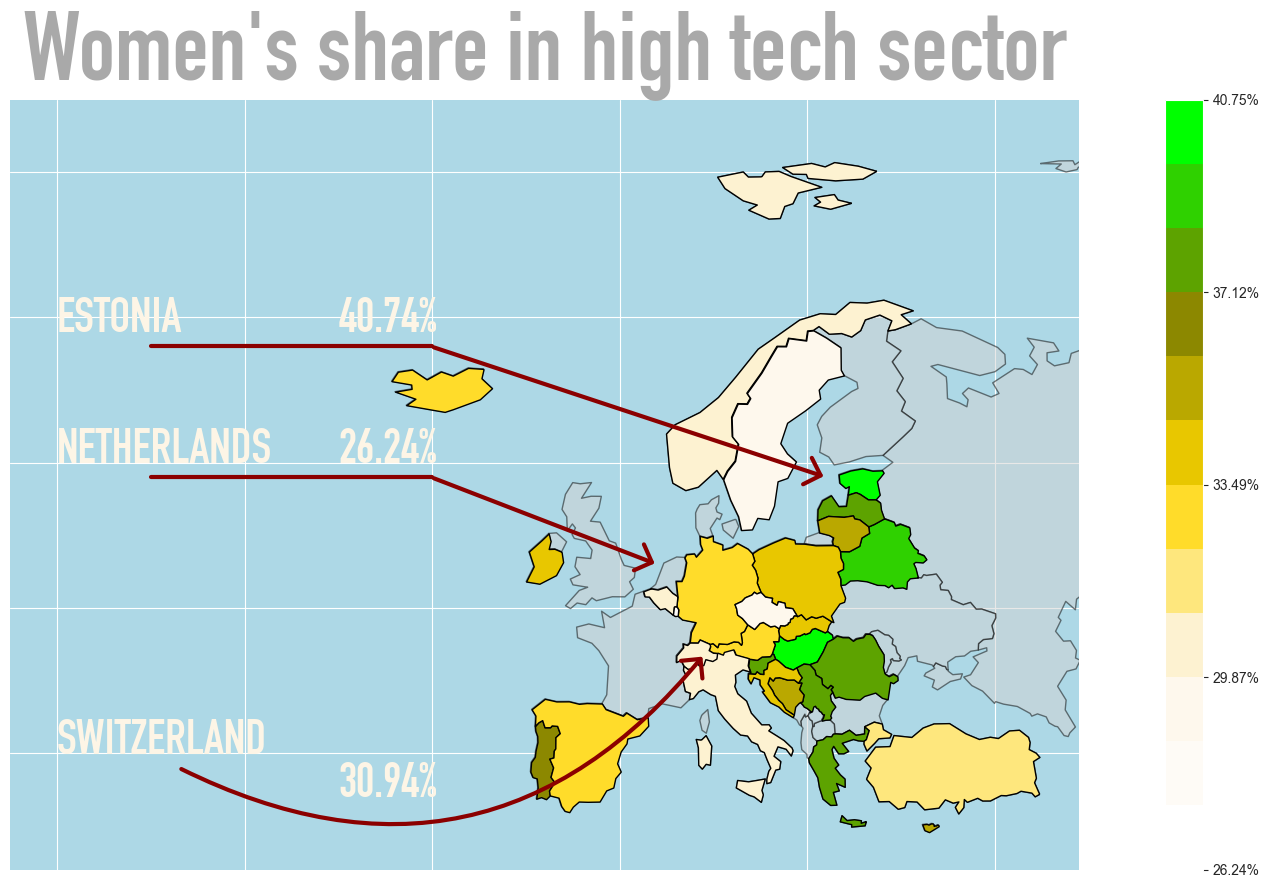

In [10]:
women['percentage'] = women['OBS_VALUE'] / total['OBS_VALUE'] # normalise values as per usual in data science

c_conversion = { # clean up discrepancy of country codes
    'AT' : 'AUT', 'BA' : 'BIH', 'BE' : 'BEL', 'BG' : 'BLR', 'CH' : 'CHE', 
    'CY' : 'CYP', 'CZ' : 'CZE', 'DE' : 'DEU', 'DK' : 'DNK', 'EA' : '...', 
    'EE' : 'EST','EL' : 'GRC', 'ES' : 'ESP', 'EU' : '...', 'FI' : 'FIN', 
    'FR' : 'FRA', 'HR' : 'HRV', 'HU' : 'HUN', 'IE' : 'IRL', 'IS' : 'ISL', 
    'IT' : 'ITA', 'LT' : 'LTU','LU' : 'LUX', 'LV' : 'LVA','MT' : 'MLT', 
    'NL' : 'NLD', 'NO' : 'NOR', 'PL' : 'POL', 'PT' : 'PRT', 'RO' : 'ROU', 
    'RS' : 'SRB', 'SE' : 'SWE', 'SI' : 'SVN','SK' : 'SVK', 'TR' : 'TUR'
}
 
annotations = [
    {'name': 'ESTONIA', 'percent': '40.74%', 'text_pos': (-60, 69), 'percent_pos': (-30, 69), 'hline_y': 68, 'arrow': {'xy': (22, 59), 'xytext': (-20.1, 68), 'rad': 0.0}},
    {'name': 'NETHERLANDS', 'percent': '26.24%', 'text_pos': (-60, 60), 'percent_pos': (-30, 60), 'hline_y': 59, 'arrow': {'xy': (4, 53), 'xytext': (-20.1, 59), 'rad': 0.0}},
    {'name': 'SWITZERLAND', 'percent': '30.94%', 'text_pos': (-60, 40), 'percent_pos': (-30, 37), 'arrow': {'xy': (9, 46.8), 'xytext': (-47, 39), 'rad': 0.4}}
]

women['geo'] = women['geo'].replace(c_conversion)
men['geo'] = men['geo'].replace(c_conversion)
total['geo'] = total['geo'].replace(c_conversion)
sorted_women = women.sort_values(by='percentage', ascending=False)

#NORMALIZE PERCENTAGES
min_percentage = women['percentage'].min()
max_percentage = women['percentage'].max()
normalized_percentages = (women['percentage'] - min_percentage) / (max_percentage - min_percentage)



fig, ax = plt.subplots(figsize=(22, 10))

europe = world[((world['CONTINENT'] == 'Europe')  |
               (world['ADMIN'].isin(['Cyprus', 'Turkey'])))] # manually add Cyprus and Turkey because geopandas is a bit .....

# plot map
europe.plot(
    ax=ax,
    color='lightgrey', 
    edgecolor="black",
    alpha=0.5
)

#COLORS
custom_cmap = LinearSegmentedColormap.from_list(name="my_cmap", 
                                                colors=["white","oldlace", "gold","olive","lime"], N=12) # customise colors https://matplotlib.org/stable/gallery/color/named_colors.html

ax.set_aspect('auto')  
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])  
cbar = plt.colorbar(sm, ax=ax)
ticks = np.linspace(0, 1, num=5)  # 5 evenly spaced ticks from 0 to 1
tick_labels = np.linspace(26.24, 40.75, num=5) 
cbar.set_ticks(ticks)
cbar.set_ticklabels(['{:.2f}%'.format(t) for t in tick_labels])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)



# BACKGROUND
ax.set_facecolor('lightblue')

#TITLE
ax.set_title('Women\'s share in high tech sector', **font_title)

# VALUES
for index, row in sorted_women.iterrows():
    country_code = row['geo']
    percentage = normalized_percentages[index] 

    country_geometry = europe[europe['SOV_A3'] == country_code]['geometry']

    if not country_geometry.empty:
        country_geometry.plot(ax=ax, color=custom_cmap(percentage), edgecolor="black")
    else:
        print("")



# ANNOTATIONS + ARROWS

line_props = {'color': 'darkred', 'linewidth': 3}
arrowstyle = "->,head_length=1.,head_width=1."

for ann in annotations:
    text = ax.text(*ann['text_pos'], ann['name'], **font_anno_light, ha='left')
    #text.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='darkred')])
    text = ax.text(*ann['percent_pos'], ann['percent'], **font_anno_light, ha='left')
    #text.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='darkred')])
    
    if 'hline_y' in ann:
        ax.plot(np.linspace(-50, -20, 15), [ann['hline_y']] * 15, **line_props)
    
    ax.annotate("", xy=ann['arrow']['xy'], xytext=ann['arrow']['xytext'],
                arrowprops=dict(arrowstyle=arrowstyle, connectionstyle=f"arc3,rad={ann['arrow']['rad']}", **line_props),
                ha='center', va='center', zorder=99)

ax.set_ylim(32, 85)
ax.set_xlim(-65, 49);